In [40]:
import numpy as np
import umap
import torch
import hdbscan
import pandas as pd
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

from pathlib import Path
from sklearn.metrics import adjusted_rand_score as ARI
from collections import defaultdict
from torch_geometric.utils import to_dense_adj

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi']= 500
plt.rcParams['font.family'] = 'Myriad Pro'
mpl.rcParams['pdf.fonttype'] = 42

In [6]:
def get_adj_matrices(original_edge_index, reconstructed):
    original_edge_index = original_edge_index.squeeze()
    original_adj = to_dense_adj(original_edge_index).squeeze()

    reconstructed = reconstructed.squeeze()
    reconstructed_adj = torch.clone(original_adj)
    reconstructed_adj[reconstructed_adj != 0] = reconstructed

    reconstructed_adj_binary = torch.where(reconstructed_adj >= 0.5, 1, 0)
    overlap = torch.where(reconstructed_adj_binary == original_adj, reconstructed_adj_binary.long(), torch.zeros(reconstructed_adj_binary.shape).long())

    return original_adj, reconstructed_adj, overlap

In [7]:
paths = Path('schisto_khvg100/').rglob('epoch25.npy')
paths_as_list = list(paths)

In [14]:
dfs = []

for p in paths_as_list:
    ps = str(p)
    name = ps.split('\\')[1]
    k = int(name.split('_')[2][1:])
    graph_type = name.split('_')[1]
    num_hvg = int(name.split('_')[0][3:])

    loaded = np.load(ps, allow_pickle=True).item()
    original = loaded[25]['edge_index']
    reconstructed = loaded[25]['reconstructed_edge_index']

    dfs.append(pd.DataFrame([[original, reconstructed, num_hvg, graph_type, k]], columns=['Original', 'Reconstructed', 'HVGs', 'Graph type', 'k']))
df = pd.concat(dfs)

In [112]:
fig, axs = plt.subplots(3, 6, figsize=(19.5, 11))
fig.tight_layout()

for j in range(6):
    k = ks[j]
    df_plot = df.loc[(df['HVGs'] == 500) & (df['Graph type'] == 'pearson') & (df['k'] == k)]
    original = df_plot['Original'].item()
    reconstructed = df_plot['Reconstructed'].item()
    original_adj, reconstructed_adj, overlap = get_adj_matrices(original, reconstructed)

    ax = axs[0][j]
    ax.pcolormesh(original_adj, cmap='cividis')
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f'K = {k}', fontsize=14)
    
    ax = axs[1][j]
    ax.pcolormesh(reconstructed_adj, cmap='cividis')
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f'K = {k}', fontsize=14)
    
    ax = axs[2][j]
    ax.pcolormesh(overlap, cmap='cividis')
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f'K = {k}', fontsize=14)
    
fig.text(0.5, 1.015, 'Original PKNN', fontsize=24, ha='center', va='center')
fig.text(0.5, 0.675, 'Reconstructed PKNN', fontsize=24, ha='center', va='center')
fig.text(0.5, 0.332, 'Binary overlap', fontsize=24, ha='center', va='center')
fig.subplots_adjust(wspace=0.15, hspace=0.3)
plt.savefig('pearson_adj_k_5_to_30.pdf', dpi=350, bbox_inches = 'tight')

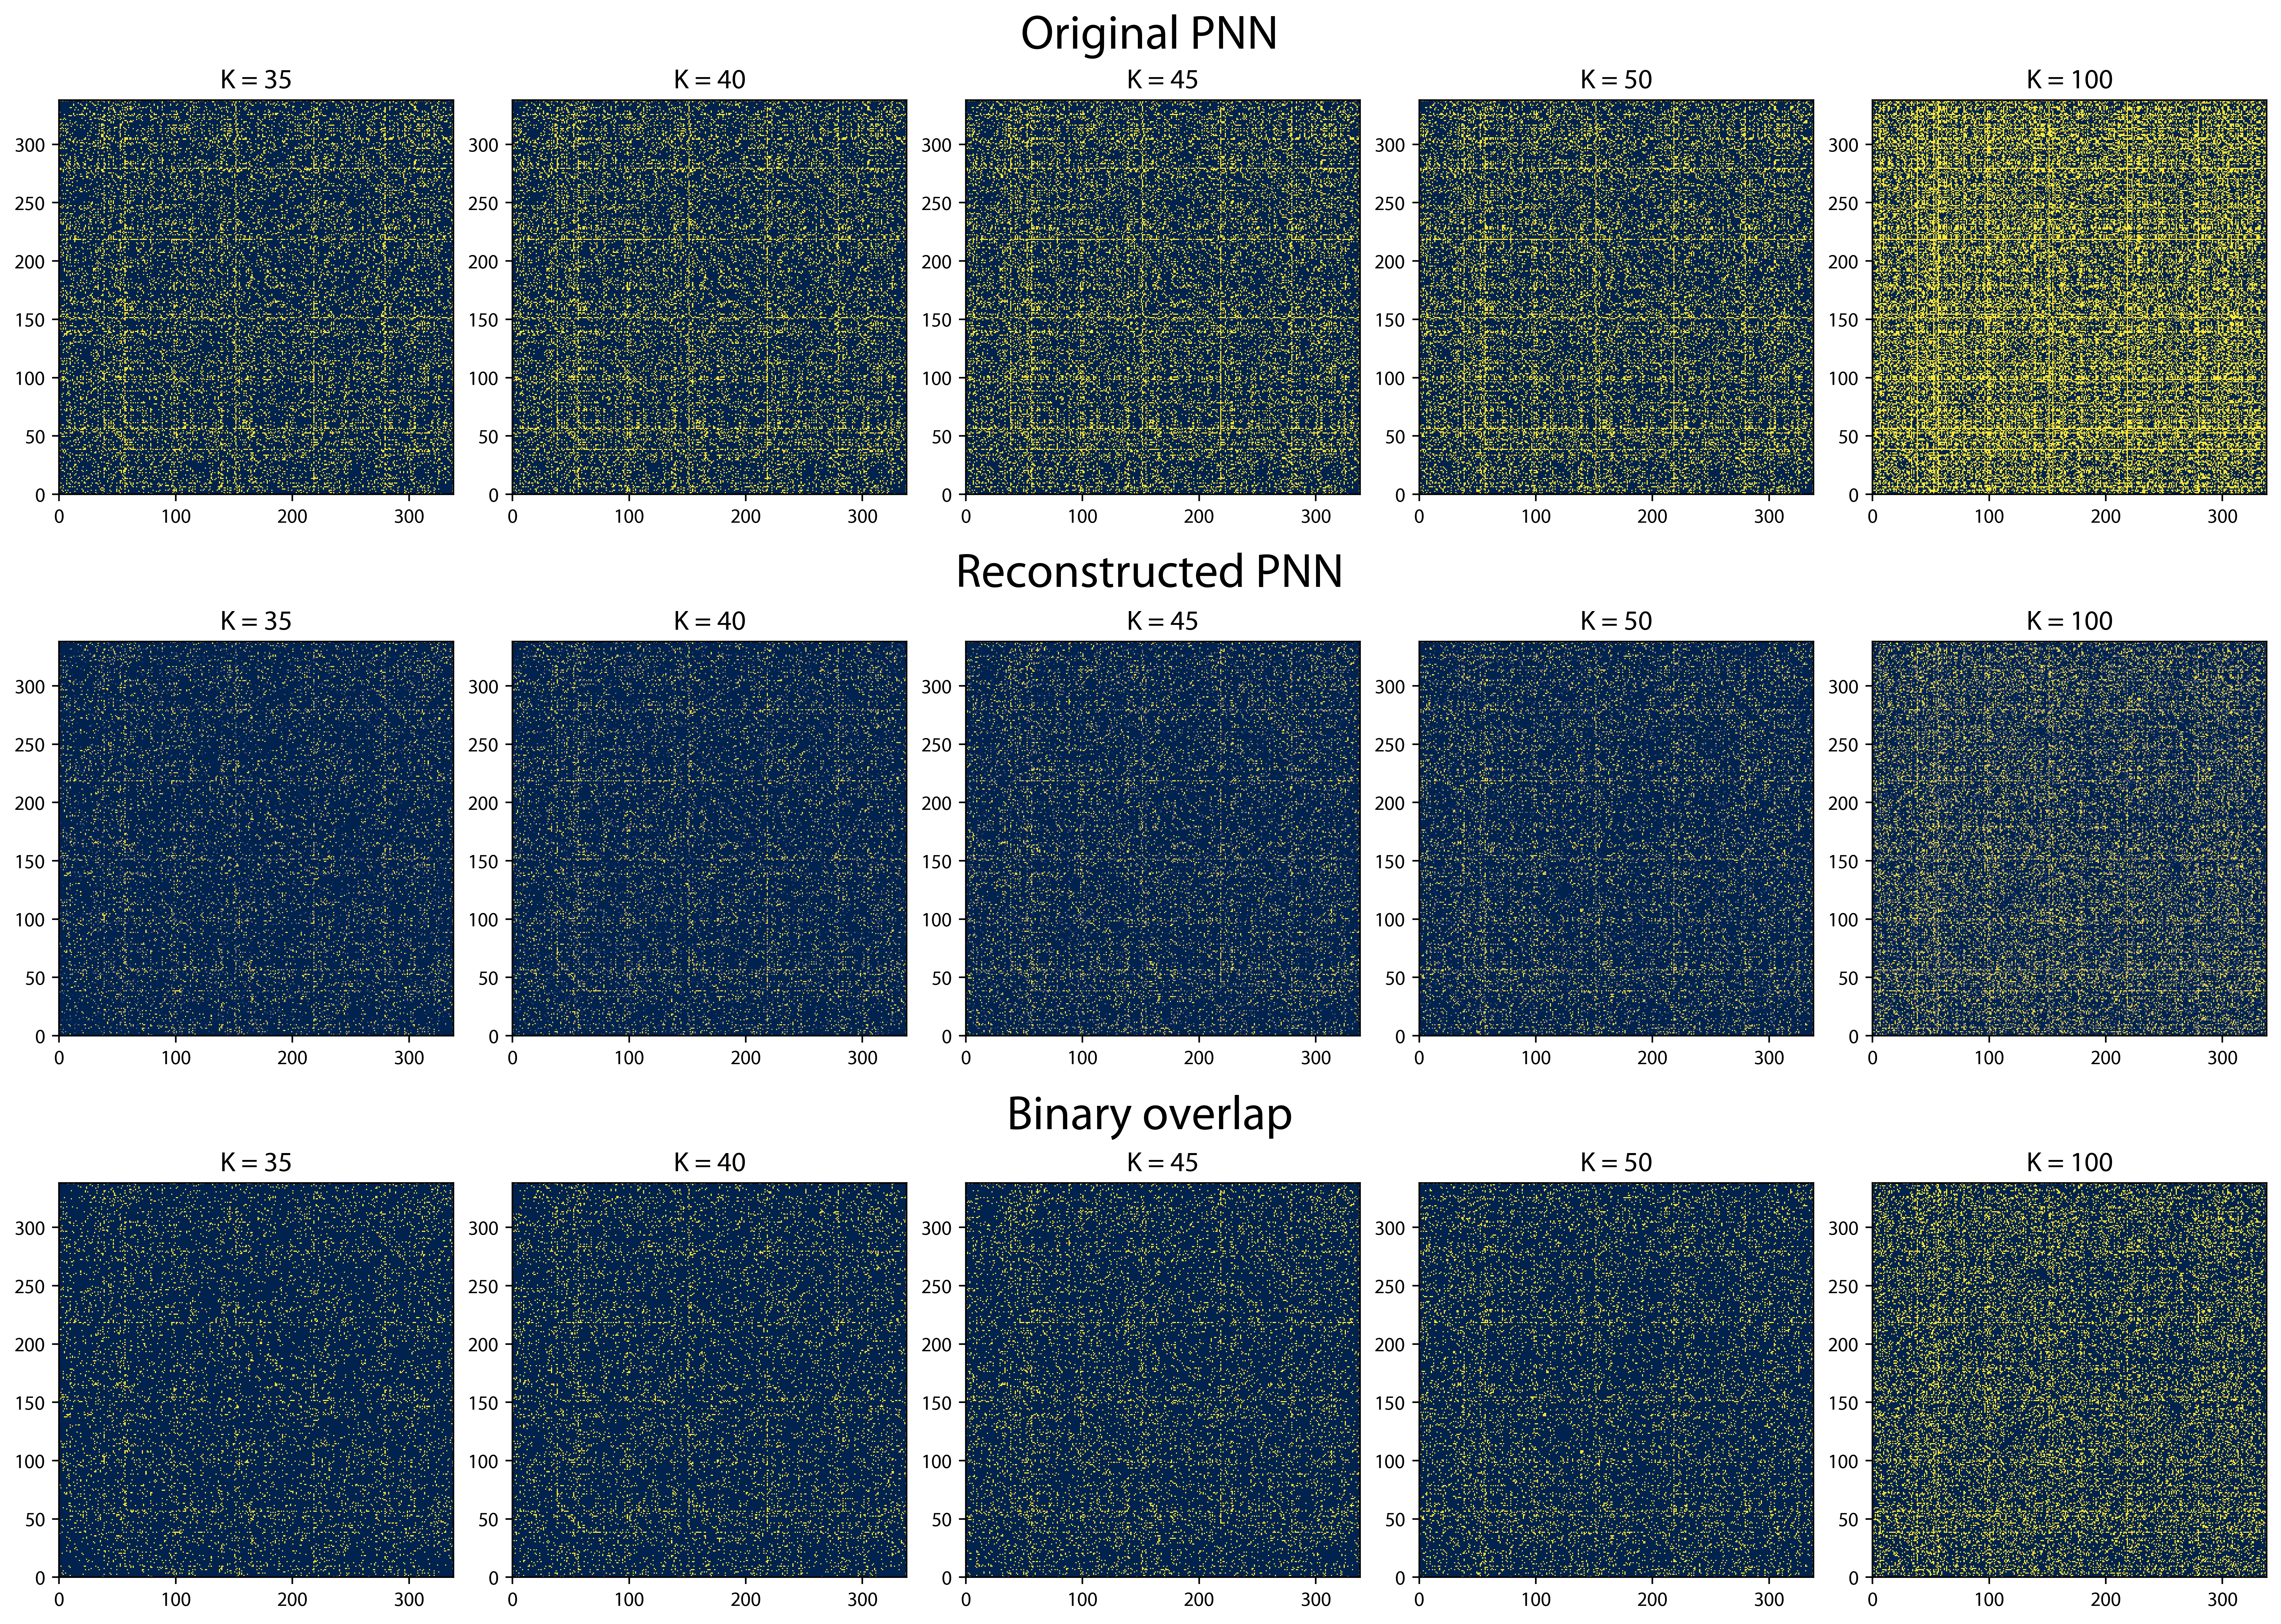

In [113]:
ks = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100]

fig, axs = plt.subplots(3, 5, figsize=(16, 11))
fig.tight_layout()

for j in range(5):
    k = ks[6:][j]
    df_plot = df.loc[(df['HVGs'] == 500) & (df['Graph type'] == 'pearson') & (df['k'] == k)]
    original = df_plot['Original'].item()
    reconstructed = df_plot['Reconstructed'].item()
    original_adj, reconstructed_adj, overlap = get_adj_matrices(original, reconstructed)

    ax = axs[0][j]
    ax.pcolormesh(original_adj, cmap='cividis')
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f'K = {k}', fontsize=14)
    
    ax = axs[1][j]
    ax.pcolormesh(reconstructed_adj, cmap='cividis')
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f'K = {k}', fontsize=14)
    
    ax = axs[2][j]
    ax.pcolormesh(overlap, cmap='cividis')
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f'K = {k}', fontsize=14)
    
fig.text(0.5, 1.015, 'Original PKNN', fontsize=24, ha='center', va='center')
fig.text(0.5, 0.675, 'Reconstructed PKNN', fontsize=24, ha='center', va='center')
fig.text(0.5, 0.332, 'Binary overlap', fontsize=24, ha='center', va='center')
fig.subplots_adjust(wspace=0.15, hspace=0.3)
plt.savefig('pearson_adj_k_35_to_100.pdf', dpi=350, bbox_inches='tight')